In [1]:
import pickle
import warnings
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from utility_functions import model_evaluate, preprocess_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [3]:
data = pd.read_pickle("data/processed_training_data.pkl")
data.head()

,Tweet,Depressive
0,severely depressed summer seriously thought haveis not depression anymore surpassed first holder new worse mental illness,1
1,like wake panic knowing thing get done today already dreading moment foot touch ground mentalhealthissues anxienty depression,1
2,bpd anxiety depression,1
3,depression make forget trying not gain weight,1
4,really survive depression,1


In [4]:
data.tail()

,Tweet,Depressive
1081861,woke no school best feeling ever,0
1081862,thewdb com cool hear old walt interview,0
1081863,ready mojo makeover ask detail,0
1081864,happy th birthday boo time tupac amaru shakur,0
1081865,happy charitytuesday,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data["Tweet"], data["Depressive"]
                                                    , test_size=.05
                                                    , stratify=data["Depressive"])

In [6]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 200000)

In [7]:
vectorizer.fit(X_train)

CountVectorizer(max_features=200000, ngram_range=(1, 2))

In [8]:
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  200000


In [9]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
print("Data Transformed.")

Data Transformed.


In [10]:
print(X_train.shape)
print(X_test.shape)

(1027772, 200000)
(54094, 200000)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43808
           1       0.97      0.82      0.89     10286

    accuracy                           0.96     54094
   macro avg       0.97      0.91      0.93     54094
weighted avg       0.96      0.96      0.96     54094

LR_model time taken : 80.31249785423279 seconds


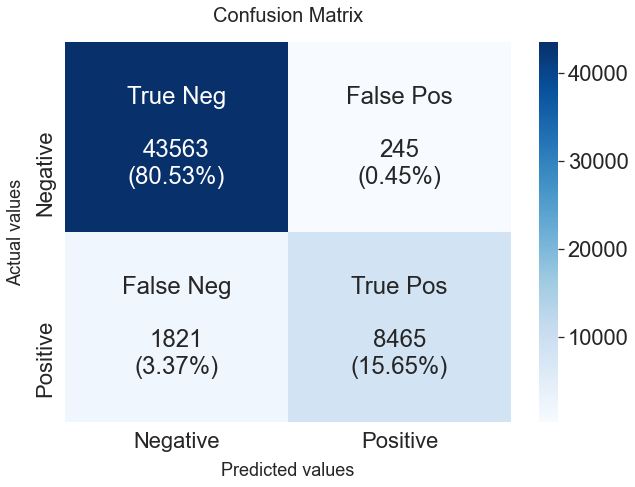

In [11]:
start = time.time()
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
LR_pred = pd.Series(model_evaluate(LR_model,X_test, y_test))
LR_time = time.time() - start
print(f"LR_model time taken : {LR_time} seconds")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43808
           1       0.95      0.82      0.88     10286

    accuracy                           0.96     54094
   macro avg       0.95      0.91      0.93     54094
weighted avg       0.96      0.96      0.96     54094

SVC_model time taken : 92.28230786323547 seconds


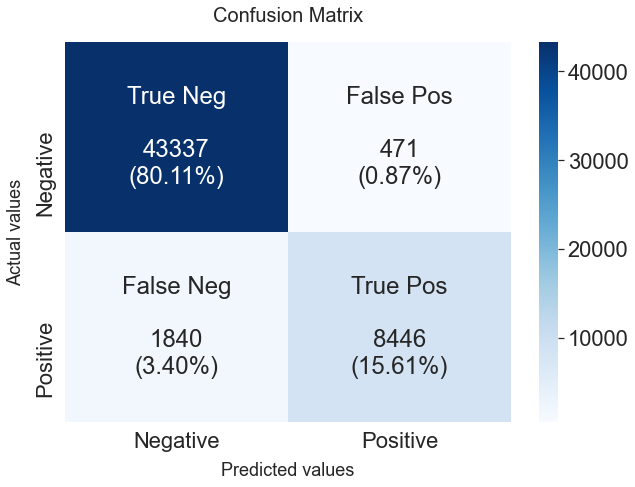

In [12]:
start = time.time()
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
SVC_pred = pd.Series(model_evaluate(SVC_model, X_test, y_test))
SVC_time = time.time() - start
print(f"SVC_model time taken : {SVC_time} seconds")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     43808
           1       0.83      0.83      0.83     10286

    accuracy                           0.94     54094
   macro avg       0.90      0.90      0.90     54094
weighted avg       0.94      0.94      0.94     54094

MNB_model time taken : 0.4536111354827881 seconds


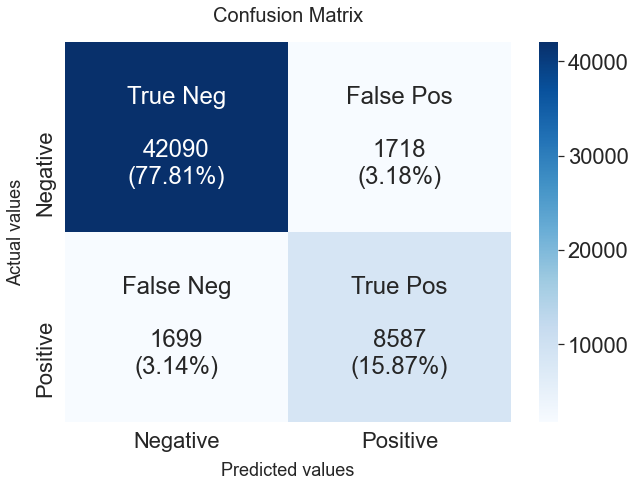

In [13]:
start = time.time()
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
MNB_pred = pd.Series(model_evaluate(MNB_model,X_test, y_test))
MNB_time = time.time() - start
print(f"MNB_model time taken : {MNB_time} seconds")

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     43808
           1       0.88      0.80      0.84     10286

    accuracy                           0.94     54094
   macro avg       0.92      0.89      0.90     54094
weighted avg       0.94      0.94      0.94     54094

BNB_model time taken : 0.5170004367828369 seconds


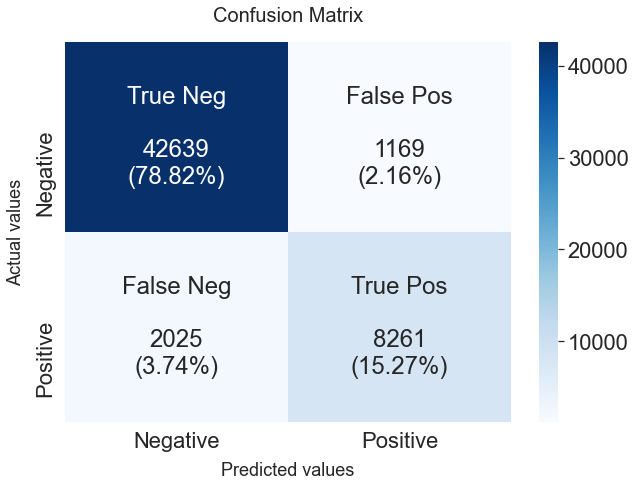

In [14]:
start = time.time()
BNB_model = BernoulliNB()
BNB_model.fit(X_train, y_train)
BNB_pred = pd.Series(model_evaluate(BNB_model,X_test, y_test))
BNB_time = time.time() - start
print(f"BNB_model time taken : {BNB_time} seconds")

[16:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43808
           1       0.99      0.80      0.89     10286

    accuracy                           0.96     54094
   macro avg       0.97      0.90      0.93     54094
weighted avg       0.96      0.96      0.96     54094

XGB_model time taken : 584.9951989650726 seconds


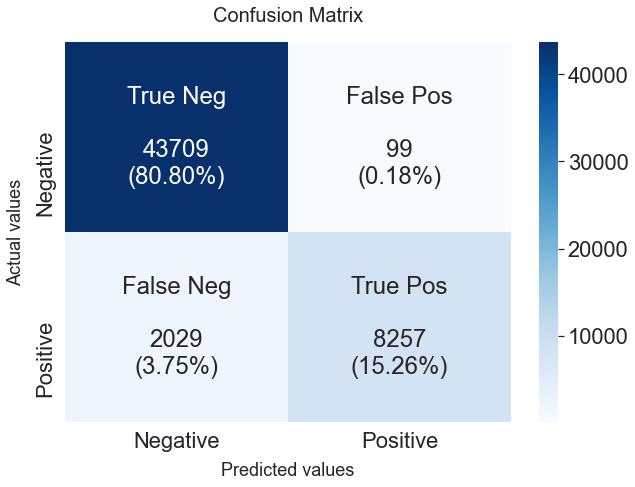

In [15]:
start = time.time()
XGB_model = XGBClassifier(max_depth=5, n_estimators=500)
XGB_model.fit(X_train, y_train)
XGB_pred = pd.Series(model_evaluate(XGB_model,X_test, y_test))
XGB_time = time.time() - start
print(f"XGB_model time taken : {XGB_time} seconds")

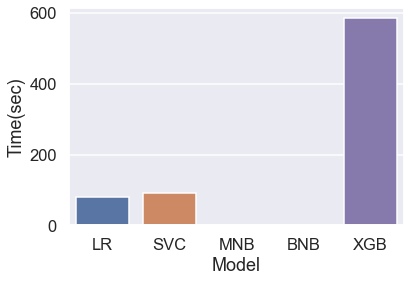

In [16]:
## Training time comparison
sns.set_context("talk", font_scale=1)

xl = ["LR", "SVC", "MNB", "BNB", "XGB"]
yl = [LR_time, SVC_time, MNB_time, BNB_time, XGB_time]

df = pd.DataFrame(list(zip(xl, yl)), columns =["Model", "Time(sec)"])

sns.barplot(x="Model", y="Time(sec)", data=df)
plt.show()

In [17]:
val_data = pd.read_csv("data/validation_tweets.csv")
val_data.head()

,Tweet,Depressive
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,I get to spend New Year's home again alone and lonely. ???•,1
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0


In [18]:
val_data["Depressive"].value_counts()

0    2357
1     843
Name: Depressive, dtype: int64

In [19]:
text, sentiment = list(val_data["Tweet"]), list(val_data["Depressive"])

In [20]:
processed_text = preprocess_data(text)

In [21]:
val_data = pd.DataFrame({"Tweet" : processed_text, "Depressive" : sentiment})
val_data.tail(10)

,Tweet,Depressive
3190,closely associated,0
3191,least not turning not outrageous thing live kaiserchiefs,0
3192,christmas without,0
3193,honestly wanna watch oth no netflix,0
3194,depression like wearing one weighted blanket make feel real good lay bed hour but also make pretty exhausting anything outside,1
3195,may new year abound health hope healing happiness coil,0
3196,not beautiful day usual,1
3197,compact metal leaf grinder four layer,0
3198,first christmas year work not feel,0
3199,okay sus let hurt go hugging ya bitter as,0


In [22]:
val_data.to_pickle("data/processed_validation_data.pkl")

In [23]:
val_x = val_data.iloc[:, lambda val_x: [0]]
val_y = val_data.iloc[:, lambda val_y: [1]]

In [24]:
val_x = val_x.squeeze()
val_y = val_y.squeeze()

In [25]:
val_x = vectorizer.transform(val_x)

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      2357
           1       0.45      0.17      0.24       843

    accuracy                           0.73      3200
   macro avg       0.60      0.55      0.54      3200
weighted avg       0.68      0.73      0.68      3200



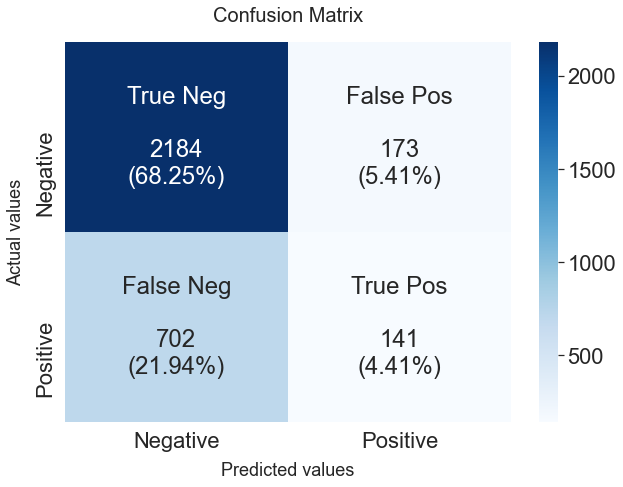

In [26]:
LR_pred = pd.Series(model_evaluate(LR_model, val_x, val_y))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2357
           1       0.43      0.20      0.27       843

    accuracy                           0.72      3200
   macro avg       0.60      0.55      0.55      3200
weighted avg       0.67      0.72      0.68      3200



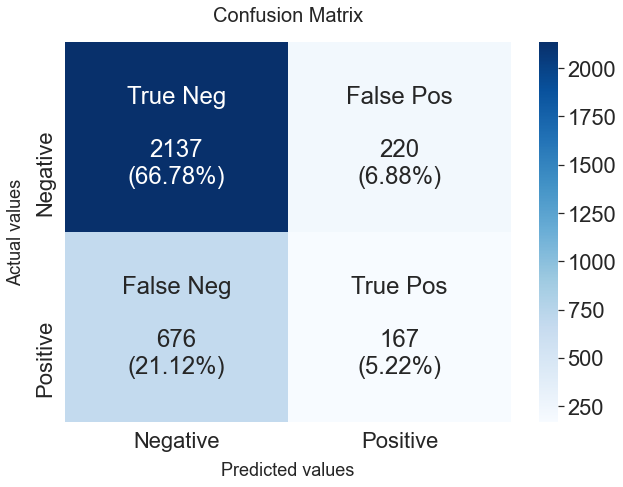

In [27]:
SVC_pred = pd.Series(model_evaluate(SVC_model, val_x, val_y))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      2357
           1       0.41      0.57      0.47       843

    accuracy                           0.67      3200
   macro avg       0.61      0.64      0.61      3200
weighted avg       0.71      0.67      0.68      3200



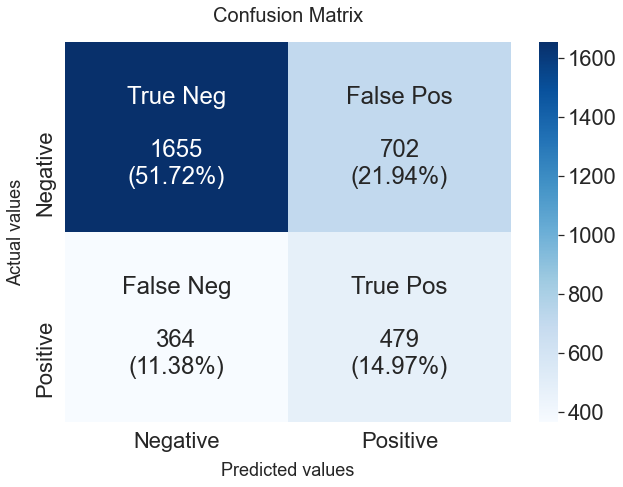

In [28]:
MNB_pred = pd.Series(model_evaluate(MNB_model, val_x, val_y))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      2357
           1       0.43      0.50      0.46       843

    accuracy                           0.69      3200
   macro avg       0.62      0.63      0.62      3200
weighted avg       0.71      0.69      0.70      3200



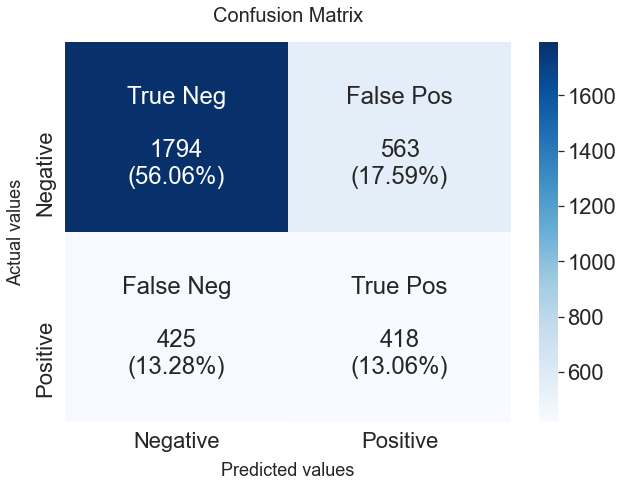

In [29]:
BNB_pred = pd.Series(model_evaluate(BNB_model, val_x, val_y))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      2357
           1       0.48      0.13      0.20       843

    accuracy                           0.73      3200
   macro avg       0.62      0.54      0.52      3200
weighted avg       0.68      0.73      0.67      3200



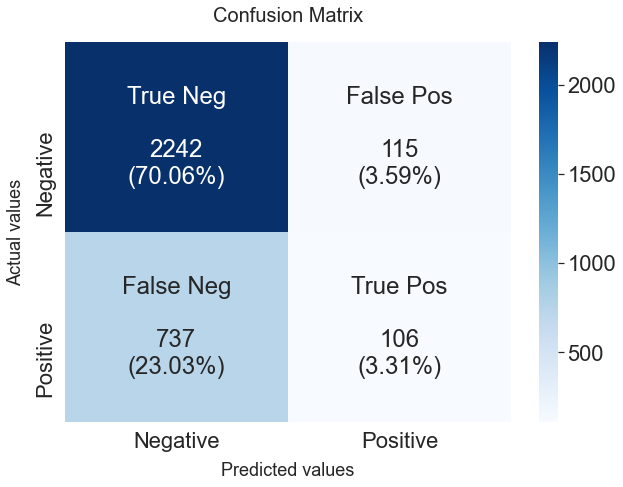

In [30]:
XGB_pred = model_evaluate(XGB_model, val_x, val_y)